<a href="https://colab.research.google.com/github/jramso/poo-JAVA-IFES/blob/main/Files/Colab/GHHL_Contrat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# - GHHL Contratação - <br> - Grupo: Josué Ramos Souza, Luiz Sampaio Horta, Mateus Lannes Cunha


# Conexão com postgres e Relatorios do Sistema

## Instalando bibliotecas de acesso ao postgres, manipulação de dados e gráficos

In [ ]:
#!pip install psycopg2-binary
#!pip install seaborn
#!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.0 MB 7.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Importando bibliotecas

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2

### Usando psycopg2 para configurar conexão

In [ ]:
conn = psycopg2.connect(host="motty.db.elephantsql.com",
                        database="gjrcqdzu", 
                        user="gjrcqdzu", 
                        password="ztDzqw6YHKqR8XvWqzUOmohDMbtjsmt3")

In [ ]:
conn

<connection object at 0x7f85859072f0; dsn: 'user=gjrcqdzu password=xxx dbname=gjrcqdzu host=motty.db.elephantsql.com', closed: 0>

# 6. Modelo lógico do trabalho

![Alt text](https://github.com/jramso/Trab_BD1_2022/blob/master/images/logico_2.jpg?raw=true "Modelo Logico")

# 7. Modelo físico

### CREATE E ALTER [TABLE]
```sql
-- Active: 1667587040170@@127.0.0.1@5432@postgres@public
/* GHHL_Logico: */

CREATE TABLE USUARIO (
    id SERIAL PRIMARY KEY,
    nome VARCHAR(50),
    data_nasc date
);

CREATE TABLE VAGA (
    ID SERIAL PRIMARY KEY,
    carga_horaria Integer,
    FK_GESTOR_Id integer,
    FK_CARGO Integer,
    FK_AREA Integer
);

CREATE TABLE CANDIDATO (
    descricao VARCHAR(50),
    qualificacao VARCHAR(50),
    id_candidato Integer,
    FK_USUARIO_id Integer,
    PRIMARY KEY (id_candidato)
);
CREATE TABLE GESTOR (
    Id SERIAL PRIMARY KEY,
    email VARCHAR(50),
    FK_USUARIO_id Integer,
    id_tipo Integer
);

CREATE TABLE CARGO (
    id SERIAL PRIMARY KEY,
    nomeCargo VARCHAR(50)
);

CREATE TABLE BAIRRO (
    id SERIAL PRIMARY KEY,
    nome_bairro VARCHAR(50)
);

CREATE TABLE CIDADE (
    id Serial PRIMARY KEY,
    nome_cidade VARCHAR(50)
);

CREATE TABLE ENDERECO (
    id SERIAL PRIMARY KEY,
    cep varchar(10),
    numero Integer,
    FK_CIDADE_id Integer,
    FK_BAIRRO_id Integer,
    FK_ESTADO_id Integer,
    FK_PAIS_id Integer,
    FK_LOGRADOURO_id Integer
);

CREATE TABLE AREA (
    id Serial PRIMARY KEY,
    nome_area VARCHAR(50)
);

CREATE TABLE LOGRADOURO (
    id SERIAL PRIMARY KEY,
    nome VARCHAR(50),
    complemento VARCHAR(50),
    FK_TIPO_LOGRADOURO Integer
);

CREATE TABLE Possui (
    fk_USUARIO_id Integer,
    fk_ENDERECO_FILIAL_PAIS_id integer
);

CREATE TABLE TIPO_LOGRADOURO (
    id SERIAL PRIMARY KEY,
    nome_tipo VARCHAR(50),
    abreviatura VARCHAR(50)
);

CREATE TABLE ESTADO (
    id SERIAL PRIMARY KEY,
    nome_estado VARCHAR(50)
);

CREATE TABLE FILIAL (
    id SERIAL PRIMARY KEY,
    telefone_fixo VARCHAR(50),
    nome_fantasia VARCHAR(50),
    FK_ENDERECO Integer,
    FK_GESTOR Integer
);

CREATE TABLE PAIS (
    id SERIAL PRIMARY KEY,
    nome_pais VARCHAR(50)
);

CREATE TABLE CONCORRE (
    id SERIAL PRIMARY KEY,
    FK_CANDIDATO Integer,
    FK_VAGA Integer
);

CREATE TABLE TIPO_GESTOR (
    id_tipo SERIAL PRIMARY KEY,
    nome_tipo VARCHAR(50)
);
/*FOREIGN KEYS de CARGO,AREA,GESTOR para VAGA*/
ALTER TABLE VAGA ADD CONSTRAINT FK_VAGA_2
    FOREIGN KEY (FK_CARGO)
    REFERENCES CARGO (id);

ALTER TABLE VAGA ADD CONSTRAINT FK_VAGA_1
    FOREIGN KEY (FK_AREA)
    REFERENCES AREA (id);
ALTER TABLE VAGA ADD CONSTRAINT FK_VAGA_3
    FOREIGN KEY (FK_GESTOR_ID)
    REFERENCES GESTOR (ID);

/*FK de Usuario para candidato*/
ALTER TABLE CANDIDATO ADD CONSTRAINT FK_CANDIDATO_1
    FOREIGN KEY (FK_USUARIO_id)
    REFERENCES USUARIO (id)
    ON DELETE CASCADE;

/*FK de USUARIO,TIPO_GESTOR para GESTOR*/
ALTER TABLE GESTOR ADD CONSTRAINT FK_GESTOR_1
    FOREIGN KEY (FK_USUARIO_id)
    REFERENCES USUARIO (id);
ALTER TABLE GESTOR ADD CONSTRAINT FK_GESTOR_2
    FOREIGN KEY (id_tipo)
    REFERENCES TIPO_GESTOR (id_tipo);
 
/*FK de CIDADE,BAIRRO,ESTADO,PAIS,LOGRADOURO para ENDERECO*/
ALTER TABLE ENDERECO ADD CONSTRAINT FK_ENDERECO_1
    FOREIGN KEY (FK_CIDADE_id)
    REFERENCES CIDADE (id)
    ON DELETE RESTRICT;
 
ALTER TABLE ENDERECO ADD CONSTRAINT FK_ENDERECO_3
    FOREIGN KEY (FK_BAIRRO_id)
    REFERENCES BAIRRO (id)
    ON DELETE RESTRICT;
 
ALTER TABLE ENDERECO ADD CONSTRAINT FK_ENDERECO_4
    FOREIGN KEY (FK_PAIS_id)
    REFERENCES PAIS (id);
 
ALTER TABLE ENDERECO ADD CONSTRAINT FK_ENDERECO_5
    FOREIGN KEY (FK_ESTADO_id)
    REFERENCES ESTADO (id);
 
ALTER TABLE ENDERECO ADD CONSTRAINT FK_ENDERECO_6
    FOREIGN KEY (FK_LOGRADOURO_id)
    REFERENCES LOGRADOURO (id);
 
/*FK de TIPO_LOGRADOURO para LOGRADOURO*/
ALTER TABLE LOGRADOURO ADD CONSTRAINT FK_LOGRADOURO_2
    FOREIGN KEY (FK_TIPO_LOGRADOURO)
    REFERENCES TIPO_LOGRADOURO (id);
 
/*altera o nome da tabela POSSUI para USUARIO_ENDERECO*/
ALTER TABLE POSSUI RENAME TO usuario_endereco;
-- FK de usuario para usuario_endereco
ALTER TABLE usuario_endereco ADD CONSTRAINT FK_Possui_1
    FOREIGN KEY (fk_USUARIO_id)
    REFERENCES USUARIO (id)
    ON DELETE RESTRICT;

-- renomeia a coluna de usuario_endereco
ALTER TABLE usuario_endereco 
    RENAME COLUMN fk_endereco_filial_pais_id TO fk_endereco_id;
-- FK de endereco para usuario_endereco
ALTER TABLE usuario_endereco ADD CONSTRAINT FK_Possui_2
    FOREIGN KEY (fk_ENDERECO_id)
    REFERENCES endereco (ID);

/*FK de GESTOR,ENDERECO para FILIAL*/
ALTER TABLE FILIAL ADD CONSTRAINT FK_FILIAL_2
    FOREIGN KEY (FK_ENDERECO)
    REFERENCES ENDERECO (id);
ALTER TABLE FILIAL ADD CONSTRAINT FK_FILIAL_3
    FOREIGN KEY (FK_GESTOR)
    REFERENCES GESTOR (id);


/*Arrumar*/
/*FK de CANDIDATO,VAGA para Concorre*/

ALTER TABLE CONCORRE ADD CONSTRAINT FK_CONCORRE_2
    FOREIGN KEY (FK_CANDIDATO)
    REFERENCES candidato (id_candidato);

ALTER TABLE CONCORRE ADD CONSTRAINT FK_CONCORRE_3
    FOREIGN KEY (FK_VAGA)
    REFERENCES VAGA (id);

--if necessary
-- ALTER TABLE CANDIDATO DROP COLUMN FK_USUARIO_ID;
--ALTER TABLE candidato ADD COLUMN FK_USUARIO_id integer;
alter table estado add COLUMN FK_id_pais INTEGER;
alter table cidade add COLUMN FK_id_estado INTEGER;
alter table bairro add COLUMN FK_id_cidade INTEGER;

ALTER TABLE estado ADD CONSTRAINT FK_pais_1
    FOREIGN KEY (FK_id_pais)
    REFERENCES pais (id);

ALTER TABLE cidade ADD CONSTRAINT FK_estado_1
    FOREIGN KEY (FK_id_estado)
    REFERENCES estado (id);
ALTER TABLE bairro ADD CONSTRAINT FK_cidade_1
    FOREIGN KEY (FK_id_cidade)
    REFERENCES cidade (id);
```

## 8. Inserts no banco:

```sql
-- Active: 1667587040170@@127.0.0.1@5432@postgres@public

--alter table vaga drop CONSTRAINT FK_VAGA_1;


insert into area (nome_area)VALUES
('programacao'),
('segurança'),
('banco de dados'),
('desenvolvimento de software'),
('marketing'),
('design'),
('analista de sistemas'),
('Engenheiro'),
('analista de compras'),
('assistente fiscal');

insert into cargo (nomecargo)VALUES
('Junior'),
('Pleno'),
('Senior'),
('Master'),
('Especialista');

INSERT INTO usuario (nome,data_nasc)
VALUES
  ('Ebony Robertson','1990-06-20'),
  ('Thaddeus Wheeler','2006-05-13'),
  ('Kelly Rivas','2015-06-28'),
  ('Macon Gill','2003-03-08'),
  ('Yuri Lewis','2000-10-18'),
  ('Abdul Goff','2022-02-08'),
  ('Porter Cotton','1993-03-01'),
  ('Tad Roth','2007-01-01'),
  ('Lysandra Mclaughlin','1994-08-27'),
  ('Mariam Dennis','2006-11-03');



  
INSERT INTO pais (nome_pais)
VALUES
  ('Portugal'), --
  ('China'), --
  ('Germany'), --
  ('Indonesia'), --
  ('United Kingdom'),--
  ('France'), --
  ('México'), --
  ('Spain'), --
  ('Colombia'),
  ('Brasil'), --
  ('United States of America'); --


INSERT INTO estado (nome_estado,fk_id_pais)
VALUES 
  ('Tabasco',7), -- Mexico ++
  ('Maranhão',10), -- Brasil ++
  ('Baja California',7), -- México ++
  ('Puebla',7), -- MExico ++
  ('Colorado',11), -- EUA ++
  ('Minnesota')11, -- EUA ++
  ('Dōngběi',2), -- China ++
  ('São Paulo',10), --Brasil ++
  ('Utah',11), -- EUA ++
  ('Michoacán',7), -- Mexico 
  ('Catalunha',8), -- portugal ++
  ('Baviera',3), --Alemanha ++
  ('Suffolk',5), -- Reino Unido - Inglaterra ++
  ('Córsega',6), -- França ++
  ('Java',4), -- Indonésia ++
  ('Lisboa',1), --portugal ++
  ('Boyacá',9), -- Colombia ++
  ('California',11); -- EUA ++




INSERT INTO cidade (nome_cidade, fk_id_estado)
VALUES
  ('Tunja',17), -- COLOMBIA capital de [BOYACA] ++++
  ('Denver',5), -- EUA Capital do [Colorado] ++++
  ('Villahermosa',1),--MEXICO Capital de [TABASCO] ++++
  ('Munique',12), -- ALEMANHA Capital de [Baviera] ++++
  ('Ipswich',13), -- UK INGLATERRA centro Adiministrativo de [Suffolk]++
  ('São paulo',8), -- Brasil capital de [SAO PAULO] ++++
  ('Jacarta',15), --INDONESIA capital de [JAVA]++++
  ('Ajaccio',14), -- FRANÇA capital de [CORSEGA] ++++(Cidade de napoleao)
  ('Lisboa',16), -- PORTUGAL capital de [LISBOA] ++++
  ('São Luís',2), -- BRASIL capital do [MARANHÃO] ++
  ('Puebla',4), -- MÉXICO capital de [PUEBLA]++
  ('Mexicali',3), -- MÉXICO capital de [BAJA CALIFORNIA] ++
  ('Saint Paul',6), -- EUA capital de [MINESSOTA] ++++
  ('Shenyang',7), -- CHINA capital de [DONGBEI] ++
  ('Salt Lake City',9), --EUA capital de [UTAH] ++
  ('Sacramento',18), --EUA capital da [CALIFORNIA] ++
  ('Morélia',10),--MÉXICO capital de [MICHOACAN]
  ('Barcelona',11), --ESPANHA capital da [CATALUNHA]
  ('Los Angeles',18); -- EUA cidade da [CALIFORNIA] ++++

INSERT INTO bairro (nome_bairro, fk_id_cidade) VALUES
('Vila Mariana',16), --Sao paulo [Sao Paulo]
('Ibirapuera',16), -- Sao paulo [São paulo]
('Santo António',19), -- Portugal [Lisboa]
('Alfama',19), -- Portugal  [Lisboa]
('La choca',13),  -- Mexico [Villahermosa]
('Summit Hill',23), -- EUA Minnesota [Saint Paul]
('Chinatown',29), -- EUA California [Los angeles]
('Maldonado',11), -- COLOMBIA [Tunja]
('Lower Downtown',12), -- EUA [Denver]
('Sendling',14), -- Alemanha [Munique]
('Ipswich',15), -- UK Inglaterra [Suffolk ipswich]
('Glodok Chinatown',17), -- Indonesia JAVA [JACARTA]
('Bairro Genoves',18), -- França  Corsega [Ajaccio] 
('Renascença',20), --Brasil Maranhao[São Luís]
('Zócalo',21), -- México Puebla [PUEBLA]
('Éguia',22), --México Baja California [Mexicali]
('Tie xi',24), -- China Dongbei [Shenyang]
('Salt Lake Valley',25), -- EUA Salt Lake City [UTAH]
('River Park',26), -- EUA California [Sacramento]
('El Gòtic',28), -- Espanha barcelona [Catalunha]
('Centro Histórico',27) -- México Michoacan [morelia]
```

# 9. Select das tabelas (Cada uma)

In [ ]:
res = pd.read_sql_query("""select * from area """,conn)
res

,id,nome_area
0,1,programacao
1,2,segurança
2,3,banco de dados
3,4,desenvolvimento de software
4,5,marketing
5,6,design
6,7,analista de sistemas
7,8,Engenheiro
8,9,analista de compras
9,10,assistente fiscal


In [ ]:
res = pd.read_sql_query("""select * from cargo """,conn)
res

,id,nomecargo
0,1,Junior
1,2,Pleno
2,3,Senior
3,4,Master
4,5,Especialista


In [ ]:
res = pd.read_sql_query("""select * from bairro """,conn)
res

,id,nome_bairro,fk_id_cidade
0,1,Vila Mariana,16
1,2,Ibirapuera,16
2,3,Santo António,19
3,4,Alfama,19
4,5,La choca,13
5,6,Summit Hill,23
6,7,Chinatown,29
7,8,Maldonado,11
8,9,Lower Downtown,12
9,10,Sendling,14


In [ ]:
res = pd.read_sql_query("""select * from cidade """,conn)
res

,id,nome_cidade,fk_id_estado
0,11,Tunja,17
1,12,Denver,5
2,13,Villahermosa,1
3,14,Munique,12
4,15,Ipswich,13
5,16,São paulo,8
6,17,Jacarta,15
7,18,Ajaccio,14
8,19,Lisboa,16
9,20,São Luís,2


In [ ]:
res = pd.read_sql_query("""select * from estado """,conn)
res

,id,nome_estado,fk_id_pais
0,1,Tabasco,7
1,2,Maranhão,10
2,3,Baja California,7
3,4,Puebla,7
4,10,Michoacán,7
5,5,Colorado,11
6,6,Minnesota,11
7,9,Utah,11
8,18,California,11
9,7,Dōngběi,2


In [ ]:
res = pd.read_sql_query("""select * from pais """,conn)
res

,id,nome_pais
0,1,Portugal
1,2,China
2,3,Germany
3,4,Indonesia
4,5,United Kingdom
5,6,France
6,7,México
7,8,Spain
8,9,Colombia
9,10,Brasil


In [ ]:
res = pd.read_sql_query("""select * from endereco """,conn)
res

,id,postal_zip,numero,fk_cidade_id,fk_bairro_id,fk_estado_id,fk_pais_id,fk_logradouro_id
0,21,143337,1316,24,17,7,2,5
1,22,FG58 5NR,4542,15,11,13,5,1
2,23,86948,3618,12,9,5,11,1
3,24,38429,4252,29,7,18,11,1
4,25,412688,1789,24,17,7,2,1
5,29,327658,1465,14,10,12,3,1
6,26,38788-24667,1565,18,13,14,6,1
7,34,64635,3926,14,10,12,3,1
8,32,425467,4982,11,18,17,9,15
9,38,727857,2202,21,15,4,7,20


In [ ]:
res = pd.read_sql_query("""select * from logradouro """,conn)
res

,id,nome,complemento,fk_tipo_logradouro
0,1,Rua Alecrim,Edificio,5
1,2,Venice Boulevard,Casa,13
2,3,Rua Branca Donadio,Bloco,1
3,4,Venice Boulevard,Apartamento,11
4,5,Sheng Li Nan Jie,Casa,7
5,6,Sheng Li Nan Jie,Edificio,9
6,7,Freemont Street,Edificio,11
7,8,16th Street Mall,Apartamento,3
8,9,16th Street Mall,Apartamento,12
9,10,Av. Calouste Gulbenkian,Casa,8


In [ ]:
res = pd.read_sql_query("""select * from tipo_logradouro """,conn)
res

,id,nome_tipo,abreviatura
0,1,Rodovia,R
1,2,Condomínio,CON
2,3,Viaduto,VD
3,4,Morro,MRO
4,5,Avenida,AV
5,6,Esplanada,ESP
6,7,Vila,VL
7,8,Lagoa,LGA
8,9,Pátio,PAT
9,10,Recanto,REC


In [ ]:
res = pd.read_sql_query("""select * from usuario """,conn)
res

,id,nome,data_nasc
0,11,Ebony Robertson,1990-06-20
1,12,Thaddeus Wheeler,2006-05-13
2,13,Kelly Rivas,2015-06-28
3,14,Macon Gill,2003-03-08
4,15,Yuri Lewis,2000-10-18
5,16,Abdul Goff,2022-02-08
6,17,Porter Cotton,1993-03-01
7,18,Tad Roth,2007-01-01
8,19,Lysandra Mclaughlin,1994-08-27
9,20,Mariam Dennis,2006-11-03


In [ ]:
res = pd.read_sql_query("""select * from usuario_endereco """,conn)
res

,fk_usuario_id,fk_endereco_id
0,13,33
1,17,40
2,15,23
3,18,30
4,18,22
5,20,31
6,16,29
7,15,34
8,12,23
9,15,29


In [ ]:
res = pd.read_sql_query("""select * from candidato """,conn)
res

,descricao,id_candidato,fk_usuario_id,fk_escolaridade
0,"pede, malesuada vel, venenatis vel,",1,21,4
1,aliquam adipiscing lacus. Ut nec,2,22,4
2,"Nam ligula elit, pretium et,",3,23,3
3,Etiam gravida molestie arcu. Sed,4,24,2
4,tellus. Suspendisse sed dolor. Fusce,5,25,2
5,"felis orci, adipiscing non, luctus",6,26,3
6,Praesent eu nulla at sem,7,27,2
7,"lacus, varius et, euismod et,",8,28,4
8,"neque sed dictum eleifend, nunc",9,29,4
9,"pellentesque, tellus sem mollis dui,",10,30,3


In [ ]:
res = pd.read_sql_query("""select * from gestor """,conn)
res

,id,email,fk_usuario_id,id_tipo
0,11,auctor@ghhlcontato.de,18,3
1,13,vestibulum.massa.rutrum@ghhlcontato.cn,19,2
2,14,vitae.posuere@ghhlcontato.co,15,2
3,15,aenean.eget@ghhlcontato.pt,17,2
4,16,nunc.est@ghhlcontato.cn,14,3
5,17,augue.eu@ghhlcontato.de,16,2
6,18,cras.convallis@ghhlcontato.uk,11,3
7,19,egestas.lacinia@ghhlcontato.id,12,2
8,20,nec.enim@ghhlcontato.fr,13,2
9,12,fusce@ghhlcontato.br,20,1


In [ ]:
res = pd.read_sql_query("""select * from tipo_gestor """,conn)
res

,id_tipo,nome_tipo
0,1,Geral
1,2,Vagas
2,3,Filial


In [ ]:
res = pd.read_sql_query("""select * from filial """,conn)
res

,id,telefone_fixo,nome_fantasia,fk_endereco,fk_gestor
0,1,3338-7731,GHHL Enterprise Ltda,35,12
1,2,726-6714,GHHL Eget Venenatis LLC,27,17
2,3,1-828-555-2009,GHHL Velit Incorporated,39,12
3,4,1-673-775-0419,GHHL Volutpat Nunc Company,37,14
4,5,1-331-248-1609,GHHL Liaoning Metus Foundation,25,16


In [ ]:
res = pd.read_sql_query("""select * from vaga """,conn)
res

,id,carga_horaria,fk_gestor_id,fk_cargo,fk_area
0,1,36,14,3,8
1,2,25,14,4,1
2,3,30,20,4,3
3,4,30,18,1,2
4,5,25,13,1,8
5,6,40,17,2,3
6,7,36,17,2,4
7,8,44,16,3,6
8,9,44,17,4,5
9,10,30,18,5,8


In [ ]:
res = pd.read_sql_query("""select * from concorre """,conn)
res

,id,fk_candidato,fk_vaga
0,1,1,8
1,2,8,1
2,3,9,3
3,4,7,2
4,5,2,8
5,6,2,3
6,7,5,4
7,8,9,6
8,9,9,5
9,10,4,8


In [ ]:
res = pd.read_sql_query("""select * from area """,conn)
res

,id,nome_area
0,1,programacao
1,2,segurança
2,3,banco de dados
3,4,desenvolvimento de software
4,5,marketing
5,6,design
6,7,analista de sistemas
7,8,Engenheiro
8,9,analista de compras
9,10,assistente fiscal


In [ ]:
res = pd.read_sql_query("""select * from cargo """,conn)
res

,id,nomecargo
0,1,Junior
1,2,Pleno
2,3,Senior
3,4,Master
4,5,Especialista


### 9.2 Consultas das tabelas com filtros `WHERE`

In [ ]:
res = pd.read_sql_query("""select e.postal_zip,e.numero from endereco as e Where e.fk_pais_id=7""",conn)
res
# codigo postal e numero de endereços do México

,postal_zip,numero
0,727857,2202
1,735226,2817
2,51159,4520
3,81230,1090


In [ ]:
res = pd.read_sql_query("""
select f.nome_fantasia as "Empresa",f.telefone_fixo as "Telefone", e.postal_zip as "CEP" from filial as f 
join endereco as e on(f.fk_endereco=e.id) 
Where f.fk_gestor=12
""",conn)
res
# nome da filial, telefone da filial e Cep do endereço da filial onde o id do gestor é 12

,Empresa,Telefone,CEP
0,GHHL Enterprise Ltda,3338-7731,61235-319
1,GHHL Velit Incorporated,1-828-555-2009,81230


# Relatórios

## Desenvolver ao menos 5 relatórios que possuam informações relavantes obtidos a partir do sistema/banco de dados proposto

## Relatório 1
### Objetivo: Obter relatório que mostre o codigo cada supervisor(a) e a quantidade de empregados supervisionados em relacao ao código.
Código para obtenção do resultado:

In [ ]:
res = pd.read_sql_query("""
                            select rg_supervisor, 
                            count(rg_supervisor) as qtd_supervisionados
                            from empregado as e 
                            where rg_supervisor is not null
                            group by e.rg_supervisor
                            """,conn)


In [ ]:
res

,rg_supervisor,qtd_supervisionados
0,3030,2
1,6060,1
2,2020,3
3,1010,1


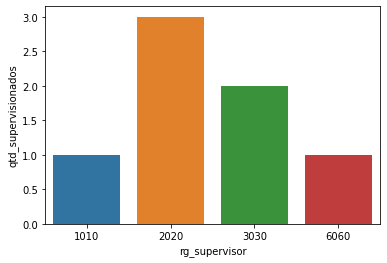

In [ ]:
sns.barplot(x='rg_supervisor',
            y='qtd_supervisionados',
            data=res)

# ==========================================================================================
## Relatório 2 
### Objetivo: Agrupe os dependentes por tipo de relação, mostrando somente o atributo relação e a quantidade de dependentes com a referida relação.
Código para obtenção do resultado:

In [ ]:
res = pd.read_sql_query("""SELECT relacao,count(relacao) as qtd_relacao
from dependente
group by relacao 
                            """,conn)
res

,relacao,qtd_relacao
0,Cônjuge,2
1,Filho,4
2,Filha,1


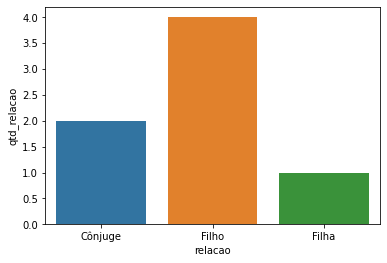

In [ ]:
sns.barplot(x='relacao',y='qtd_relacao',data=res,)


# ============================================================
## Relatório 3 
### Objetivo: Mostrar para cada empregado o seu nome e a soma total da quantidade de horas alocadas incluindo todos os projetos na qual é participante. O Resultado deve ser apresentado em ordem decrescente relativa ao que tema maior quantidade de horas alocada para o que possui menor quantidade.
Código para obtenção do resultado:

In [ ]:
res = pd.read_sql_query("""
                  SELECT  e.nome,sum(ep.horas) as qtd_total_horas_em_projetos
from empregado e
inner join empregado_projeto ep
on ep.rg_empregado=e.rg
inner join projeto p
on ep.numero_projeto = p.numero
group by e.nome
order by qtd_total_horas_em_projetos desc
                  """,conn)
res

,nome,qtd_total_horas_em_projetos
0,João Antonio,70
1,Jorge,50
2,Fernanda,35
3,Renata,35
4,Ricardo,35


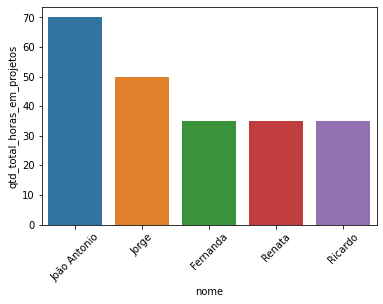

In [ ]:
plt.xticks(rotation=45)
sns.barplot(x='nome',y='qtd_total_horas_em_projetos',data=res,)

# ============================================================
## Relatório 4 
### Objetivo: Mostrar o nome do departamento e a quantidade de funcionários alocados a cada departamento.

Código para obtenção do resultado:

In [ ]:
res = pd.read_sql_query("""
                          select d.nome,count(e.nome) as qtd_alocados_depto
                            from departamento d 
                            inner join empregado e 
                            on e.depto = d.numero 
                            group by d.nome
""",conn)
res

,nome,qtd_alocados_depto
0,Engenharia Civil,3
1,Engenharia Mecânica,2
2,Contabilidade,3


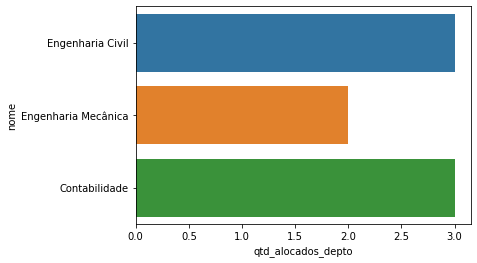

In [ ]:
sns.barplot(y='nome',x='qtd_alocados_depto',data=res)

# ============================================================
## Relatório 5
### Objetivo: Mostre o nome do departamento e a soma total dos salários dos empregados por departamento.
Código para obtenção do resultado:


In [ ]:
res = pd.read_sql_query("""
                           select d.nome,sum(e.salario) as total_salario_depto
 from departamento d 
inner join empregado e 
on e.depto = d.numero 
group by d.nome
                            """,conn)
res

,nome,total_salario_depto
0,Engenharia Civil,6800.0
1,Engenharia Mecânica,5000.0
2,Contabilidade,15450.0


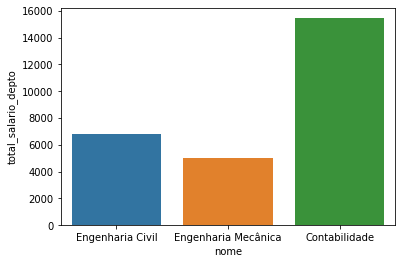

In [ ]:
sns.barplot(x='nome',y='total_salario_depto', data=res)

# ============================================================
## Relatório 6
### Objetivo: Obter os nomes dos empregados, departamento e salário e apresentar um gráfico que possibilite analisar os salarios em função dos salários obtidos.
==>(Importante: ao escolhar o gráfico, verifique se ele é perfeitamente compreensível e se trás informações relevantes)

Código para obtenção do resultado:


In [ ]:
res = pd.read_sql_query("""
                  select emp.nome,dep.nome as departamento,salario
                      from empregado emp 
                            inner join departamento dep
                            on (emp.depto = dep.numero)
                            order by departamento,salario desc""",conn)
res

,nome,departamento,salario
0,João Luiz,Contabilidade,6000.0
1,Fernanda,Contabilidade,5500.0
2,João Antonio,Contabilidade,3950.0
3,Jorge,Engenharia Civil,3200.0
4,Ricardo,Engenharia Civil,2300.0
5,Renata,Engenharia Civil,1300.0
6,Luiz Renato,Engenharia Mecânica,3000.0
7,Luiz Fernando,Engenharia Mecânica,2000.0


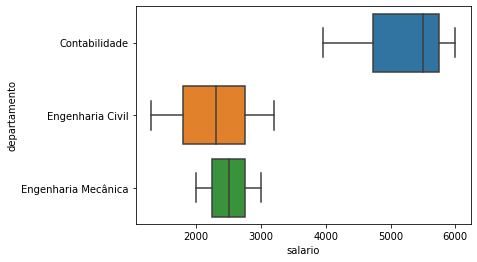

In [ ]:
sns.boxplot(y="departamento", x="salario", data=res)

# Explicação do Gráfico

Análise do Gráfico
A Mediana (Md) representa o valor central de um conjunto de dados. Para encontrar o valor da mediana é necessário colocar os valores em ordem crescente ou decrescente.

Quando o número elementos de um conjunto é par, a mediana é encontrada pela média dos dois valores centrais. Assim, esses valores são somados e divididos por dois.


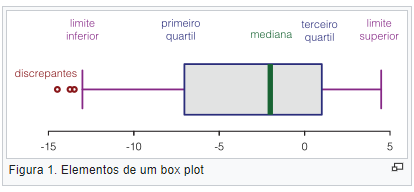

In [ ]:
conn.close() 